<a href="https://colab.research.google.com/github/mthbrito/Formata-dados-Hidroweb/blob/main/Obten%C3%A7%C3%A3o_de_dados_pluviom%C3%A9tricos_contidos_em_determinada_%C3%A1rea_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalação das bibliotecas HydroBr, Geopandas e Shapely**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install hydrobr -q
import hydrobr
import geopandas as gpd
from shapely.geometry import Point

**Leitura do shapefile das sub-bacias brasileiras**

<Axes: >

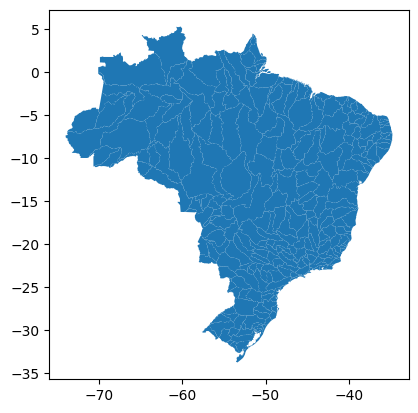

In [3]:
gdf = gpd.read_file('/content/drive/MyDrive/Dados Pluviométricos/Shapefiles/GEOFT_PNRH_SUB2.shp')
gdf.plot()

**Visualização dos dados do shapefile**

In [4]:
gdf.head(5)

,PS2_CD,PS2_PS1_CD,PS2_RHI_CD,PS2_NM,PS2_NM_RIO,PS2_NM_R_1,PS2_NM_INF,PS2_AR_HA,PS2_AR_KM2,PS2_GM_ARE,PS2_GM_PER,PS2_GM_POL,geometry
0,23,761,7,BARRA SECA,None,None,None,0.0,0.0,0.0,0.0,None,"POLYGON ((-40.20044 -18.76328, -40.18715 -18.7..."
1,1,651,1,ACARÁ,None,None,None,0.0,0.0,0.0,0.0,None,"POLYGON ((-48.46880 -1.53305, -48.46058 -1.531..."
2,2,731,4,ACARAÚ,None,None,None,0.0,0.0,0.0,0.0,None,"POLYGON ((-40.13977 -2.86076, -40.11560 -2.861..."
3,3,471,0,AMAZONAS 01,None,None,None,0.0,0.0,0.0,0.0,None,"POLYGON ((-59.98478 -2.39077, -59.97663 -2.398..."
4,4,451,0,AMAZONAS 02,None,None,None,0.0,0.0,0.0,0.0,None,"POLYGON ((-56.63090 -4.28582, -56.63092 -4.293..."


**Importação da biblioteca Pandas para manipulação e extração de informações do dataset**

In [5]:
import pandas as pd
pd.unique(gdf['PS2_NM'])

array(['BARRA SECA', 'ACARÁ', 'ACARAÚ', 'AMAZONAS 01', 'AMAZONAS 02',
       'AMAZONAS 03', 'AMAZONAS 04', 'AMAZONAS 05', 'AMAZONAS 06',
       'AMAZONAS 07', 'AMAZONAS 08', 'AMAZONAS 09', 'APA', 'APODI',
       'AQUIDAUANA', 'ARAGUAIA 01', 'ARAGUAIA 02', 'ARAGUAIA 03',
       'ARAGUAIA 04', 'ARAGUAIA 05', 'ARAGUARI', 'ARAGUARI AP',
       'ARIPUANÃ', 'BOIS', 'BRÍGIDA', 'CAÍ', 'CANOAS', 'CAPIBARIBE',
       'CARINHANHA', 'CEARÁ MIRIM', 'CINZAS', 'CONTAS 01', 'COREAÚ',
       'CORRENTE', 'CORUMBÁ', 'CUIABÁ 01', 'CUIABÁ 02', 'CUIABÁ 03',
       'CURU', 'CURUÁ-UNA', 'DOCE 01', 'DOCE 02', 'DOCE 03', 'DOCE 04',
       'DOCE 05', 'DOCE 06', 'FOZ TOCANTINS', 'GRANDE PR 01',
       'GRANDE PR 02', 'GRANDE PR 03', 'GRANDE PR 04', 'GRANDE PR 05',
       'GRANDE PR 06', 'GRANDE PR 07', 'GRANDE PR 08', 'GRANDE PR 09',
       'GRANDE PR 10', 'GRANDE PR 11', 'GRANDE PR 12', 'GRANDE PR 13',
       'GRANDE PR 14', 'GRANDE PR 15', 'GRANDE SF 01', 'GRANDE SF 02',
       'GRAVATAÍ', 'GUAÍBA 01', 'GUAÍBA 

**Filtragem da geometria da sub-bacia do Pajeú**

In [6]:
gdf_pajeu = gdf[gdf['PS2_NM']=='PAJEÚ']
gdf_pajeu

,PS2_CD,PS2_PS1_CD,PS2_RHI_CD,PS2_NM,PS2_NM_RIO,PS2_NM_R_1,PS2_NM_INF,PS2_AR_HA,PS2_AR_KM2,PS2_GM_ARE,PS2_GM_PER,PS2_GM_POL,geometry
161,162,742,5,PAJEÚ,None,None,None,0.0,0.0,0.0,0.0,None,"POLYGON ((-37.34956 -7.94629, -37.35175 -7.945..."


**Plotagem da geometria da sub-bacia do Pajeú**

<Axes: >

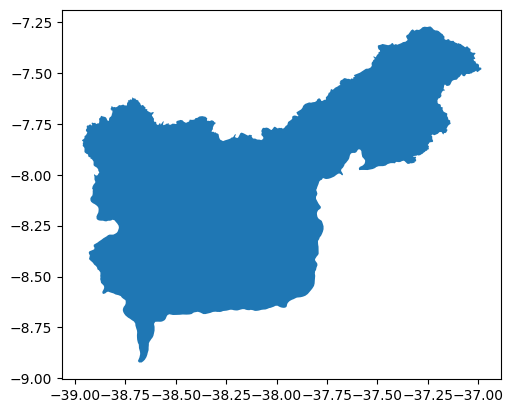

In [7]:
gdf_pajeu.plot()

**Verificação do sistema de coordenadas**

In [8]:
gdf_pajeu.crs

<Geographic 2D CRS: EPSG:4618>
Name: SAD69
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Brazil - onshore and offshore. In rest of South America - onshore north of approximately 45°S and Tierra del Fuego.
- bounds: (-91.72, -55.96, -25.28, 12.52)
Datum: South American Datum 1969
- Ellipsoid: GRS 1967 Modified
- Prime Meridian: Greenwich

**Leitura e visualização do shapefile dos limites dos municípios brasileiros**

In [9]:
gdf_brasil = gpd.read_file('/content/drive/MyDrive/Dados Pluviométricos/Shapefiles/BR_Municipios_2022.shp')
gdf_brasil.head(5)

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.35502 -11.50452, -61.35524 -11.5..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-60.82135 -13.11910, -60.81773 -13.1..."


**Filtragem e plotagem da geometria do estado de Pernambuco**

<Axes: >

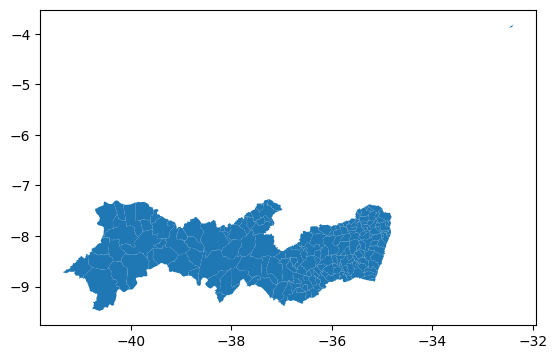

In [10]:
gdf_pernambuco = gdf_brasil[gdf_brasil['SIGLA_UF']=='PE']
gdf_pernambuco.plot()

**Junção das geometrias da sub-bacia do Pajeú e dos limites do municípios de Pernambuco**

<Axes: >

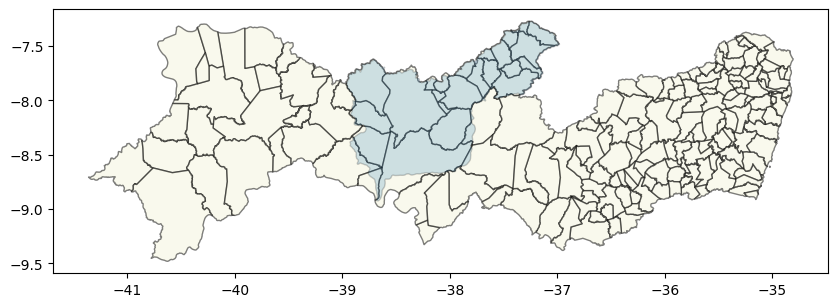

In [11]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,10))
gdf_pernambuco = gdf_pernambuco[~(gdf_pernambuco['NM_MUN'] == 'Fernando de Noronha')]
gdf_pernambuco.plot(ax=ax, edgecolor='black',alpha=0.5, color='beige')
gdf_pajeu.plot(ax=ax, edgecolor='black', alpha=0.2, categorical=True)

**Aquisição dos dados referentes aos postos pluviométricos**

In [12]:
lista_prec = hydrobr.get_data.ANA.list_prec_stations()
lista_prec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11976 entries, 0 to 11975
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         11976 non-null  object 
 1   Code         11976 non-null  object 
 2   Type         11976 non-null  int64  
 3   SubBasin     11976 non-null  int64  
 4   City         11975 non-null  object 
 5   State        11976 non-null  object 
 6   Responsible  11976 non-null  object 
 7   Latitude     11976 non-null  float64
 8   Longitude    11976 non-null  float64
 9   StartDate    11976 non-null  object 
 10  EndDate      11976 non-null  object 
 11  NYD          11976 non-null  int64  
 12  MD           11976 non-null  float64
 13  N_YWOMD      11976 non-null  int64  
 14  YWMD         11976 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.4+ MB


**Plotagem de todos os postos pluviométricos presentes na base de dados**

<Axes: >

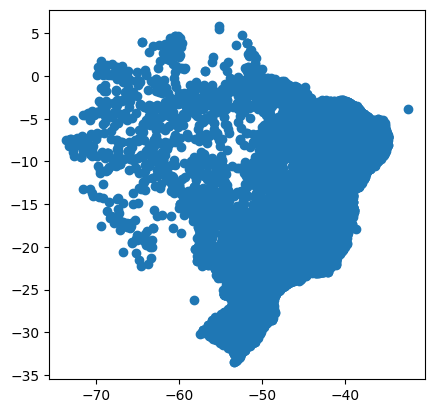

In [13]:
pontos = [Point(x) for x in zip(lista_prec.Longitude, lista_prec.Latitude)]
crs={'proj':'latlong','ellps':'WGS84','datum':'WGS84','no_def':True}
gdf_pontos = gpd.GeoDataFrame(lista_prec, geometry=pontos, crs=crs)
gdf_pontos.plot()

**Verificação do sistema de coordenadas**

In [14]:
gdf_pajeu=gdf_pajeu.to_crs(crs=gdf_pontos.crs)
gdf_pajeu.crs

<Geographic 2D CRS: +proj=latlong +ellps=WGS84 +datum=WGS84 +no_def +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**Listagem dos postos pluviométricos inseridos na sub-bacia do Pajeú**

In [15]:
indices = gdf_pontos.geometry.within(list(gdf_pajeu.geometry)[0])
lista_selecionada = gdf_pontos[indices]
lista_selecionada.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 43 entries, 2408 to 2955
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         43 non-null     object  
 1   Code         43 non-null     object  
 2   Type         43 non-null     int64   
 3   SubBasin     43 non-null     int64   
 4   City         43 non-null     object  
 5   State        43 non-null     object  
 6   Responsible  43 non-null     object  
 7   Latitude     43 non-null     float64 
 8   Longitude    43 non-null     float64 
 9   StartDate    43 non-null     object  
 10  EndDate      43 non-null     object  
 11  NYD          43 non-null     int64   
 12  MD           43 non-null     float64 
 13  N_YWOMD      43 non-null     int64   
 14  YWMD         43 non-null     float64 
 15  geometry     43 non-null     geometry
dtypes: float64(4), geometry(1), int64(4), object(7)
memory usage: 5.7+ KB


**Plotagem dos postos pluviométricos inseridos na sub-bacia do Pajeú**

<Axes: >

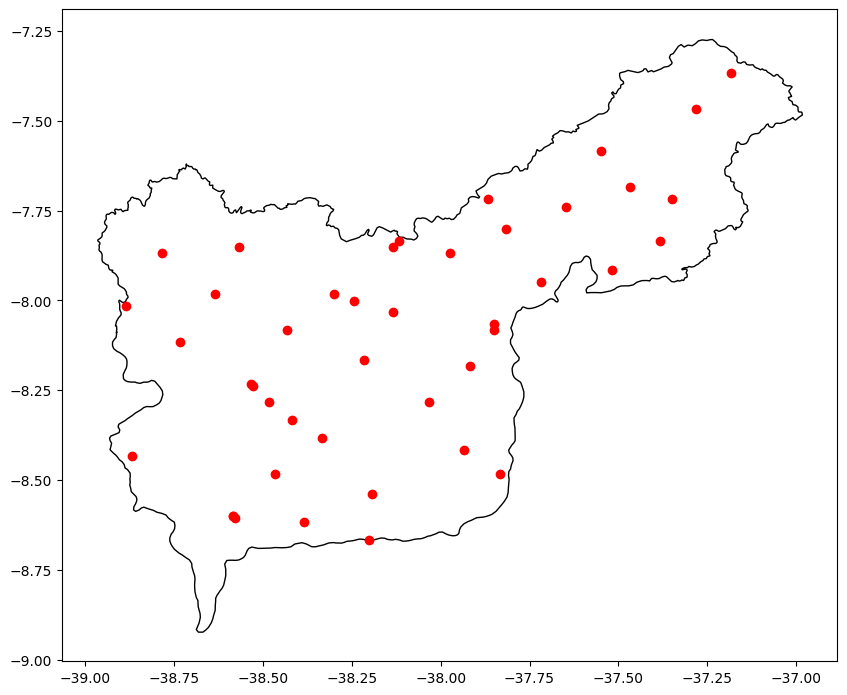

In [16]:
fig,ax=plt.subplots(figsize=(10,10))
gdf_pajeu.plot(ax=ax, color='white', edgecolor='black')
lista_selecionada.plot(ax=ax, marker='o',color='red')

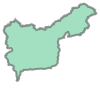

In [17]:
list(gdf_pajeu.geometry)[0]

**Filtragem dos dados pluviométricos contidos apenas na sub-bacia do Pajeú**

In [18]:
codigos = lista_selecionada.Code.to_list()
dados_prec = hydrobr.get_data.ANA.prec_data(codigos)
dados_prec.info()

100%|██████████| 43/43 [02:16<00:00,  3.18s/it]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41304 entries, 1911-01-01 to 2024-01-31
Freq: D
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   00737023  3309 non-null   float64
 1   00737025  958 non-null    float64
 2   00737026  961 non-null    float64
 3   00737027  3472 non-null   float64
 4   00737029  525 non-null    float64
 5   00737030  989 non-null    float64
 6   00737031  899 non-null    float64
 7   00737032  1021 non-null   float64
 8   00737033  987 non-null    float64
 9   00737035  961 non-null    float64
 10  00737036  2385 non-null   float64
 11  00737037  772 non-null    float64
 12  00738027  929 non-null    float64
 13  00738028  928 non-null    float64
 14  00738029  2540 non-null   float64
 15  00738030  2477 non-null   float64
 16  00738032  2293 non-null   float64
 17  00738035  523 non-null    float64
 18  00837013  1084 non-null   float64
 19  00837016  1020 non-null   float64
 20  008

**Visualização dos dados de todos os postos pluviométricos filtrados**

In [19]:
dados_prec.to_csv('dados_precipitacao_doce.csv', sep=';')

In [20]:
dados_prec

,00737023,00737025,00737026,00737027,00737029,00737030,00737031,00737032,00737033,00737035,...,00838018,00838019,00838020,00838021,00838025,00838026,00838028,00838031,00838035,00838036
1911-01-01,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1911-01-02,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1911-01-03,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1911-01-04,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1911-01-05,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-27,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.8,NaN,NaN,NaN,0.0,NaN,NaN
2024-01-28,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,24.0,NaN,NaN
2024-01-29,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN
2024-01-30,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,5.3,NaN,NaN
